## Credit Card Fraud Detection using CNN

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.9.1


In [6]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_excel('brazilian credit card.xlsx')

In [8]:
data.shape

(374823, 18)

In [9]:
data.isnull().sum()

mcc_cat numeric                0
mcc_ant_cat numeric            0
cep_cat numeric                0
cep_ant_cat numeric            0
valor_trans_cat numeric        0
valor_trans_ant_cat numeric    0
pos_entry numeric              0
lim_cred_cat numeric           0
bandeira_cat numeric           0
variante_cat numeric           0
score_cat numeric              0
tp_pessoa_cat numeric          0
trans_nacional_cat numeric     0
qtde_parc_cat numeric          0
velocidade_cat numeric         0
dif_score_cat numeric          0
trans_limit_cat numeric        0
Class                          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   mcc_cat numeric              374823 non-null  int64
 1   mcc_ant_cat numeric          374823 non-null  int64
 2   cep_cat numeric              374823 non-null  int64
 3   cep_ant_cat numeric          374823 non-null  int64
 4   valor_trans_cat numeric      374823 non-null  int64
 5   valor_trans_ant_cat numeric  374823 non-null  int64
 6   pos_entry numeric            374823 non-null  int64
 7   lim_cred_cat numeric         374823 non-null  int64
 8   bandeira_cat numeric         374823 non-null  int64
 9   variante_cat numeric         374823 non-null  int64
 10  score_cat numeric            374823 non-null  int64
 11  tp_pessoa_cat numeric        374823 non-null  int64
 12  trans_nacional_cat numeric   374823 non-null  int64
 13  qtde_parc_cat numeric        

In [11]:
data['Class'].value_counts()

0    360792
1     14031
Name: Class, dtype: int64

In [12]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [14]:
X_train.shape, X_test.shape

((299858, 17), (74965, 17))

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [17]:
X_train.shape

(299858, 17)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
X_train.shape, X_test.shape

((299858, 17, 1), (74965, 17, 1))

### Build CNN 

In [20]:
epochs = 500
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 16, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall'])

In [23]:
history = model.fit(X_train, y_train, epochs=epochs,batch_size=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
600/600 [==============================] - 32s 46ms/step - loss: 0.1436 - accuracy: 0.9581 - precision: 0.2394 - recall: 0.0551 - val_loss: 0.1101 - val_accuracy: 0.9626 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
600/600 [==============================] - 23s 39ms/step - loss: 0.1177 - accuracy: 0.9625 - precision: 0.4530 - recall: 0.0142 - val_loss: 0.1048 - val_accuracy: 0.9628 - val_precision: 0.8571 - val_recall: 0.0064
Epoch 3/500
600/600 [==============================] - 24s 40ms/step - loss: 0.1138 - accuracy: 0.9628 - precision: 0.5551 - recall: 0.0350 - val_loss: 0.1032 - val_accuracy: 0.9631 - val_precision: 0.9111 - val_recall: 0.0146
Epoch 4/500
600/600 [==============================] - 26s 43ms/step - loss: 0.1104 - accuracy: 0.9628 - precision: 0.5291 - recall: 0.0462 - val_loss: 0.1010 - val_accuracy: 0.9630 - val_precision: 0.8723 - val_recall: 0.0146
Epoch 5/500
600/600 [==============================] - 25s 42ms/step - loss: 0.1086 

In [24]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]> 0.5

In [25]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_probs)
print('f1: %f' % f1)
auc_score=roc_auc_score(y_test, yhat_probs)
print('auc_score: %f' % auc_score)

Accuracy: 0.986314
Precision: 0.980043
Recall: 0.647541
f1: 0.779828
auc_score: 0.823514


In [26]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

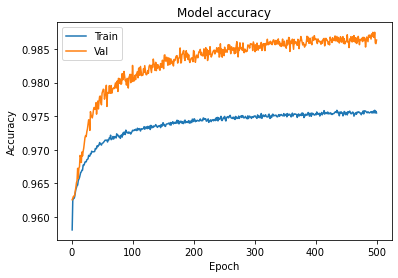

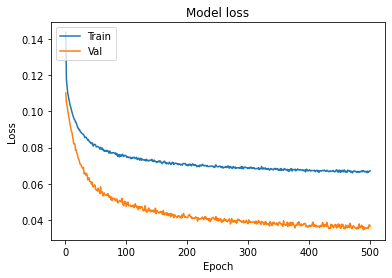

In [27]:
plot_learningCurve(history, epochs)